Thefocus for this week is linear regression.

In [178]:
#STEP 1
#We start by importing all the relevant modules
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

In [179]:
#STEP 2
#Then setting parameters for all the plots that we are going to do
plt.rcParams.update(
    {
        "lines.markersize": 10,
        "font.size": 15,
        "xtick.major.size": 5,
        "ytick.major.size":5,
    }
)

In [180]:
#STEP 3
#Then we generate our synthetic data
np.random.seed(0)
x = np.linspace(0,1,30)
y = np.exp(-(x - 0.5)**2/0.2**2) + np.random.normal(0,0.15, size = len(x))

In [181]:
#STEP 3.1
#Now let's try understand our data
print(len(x)) #returns 30
print(type(x)) #numpy array
print(x) #a list starting at 0 and ending at 1 containing 30 elements which are equally split and incremental in their order

30
<class 'numpy.ndarray'>
[0.         0.03448276 0.06896552 0.10344828 0.13793103 0.17241379
 0.20689655 0.24137931 0.27586207 0.31034483 0.34482759 0.37931034
 0.4137931  0.44827586 0.48275862 0.51724138 0.55172414 0.5862069
 0.62068966 0.65517241 0.68965517 0.72413793 0.75862069 0.79310345
 0.82758621 0.86206897 0.89655172 0.93103448 0.96551724 1.        ]


Text(0.5, 1.0, 'Scatterplot showing the synthetic data y against x')

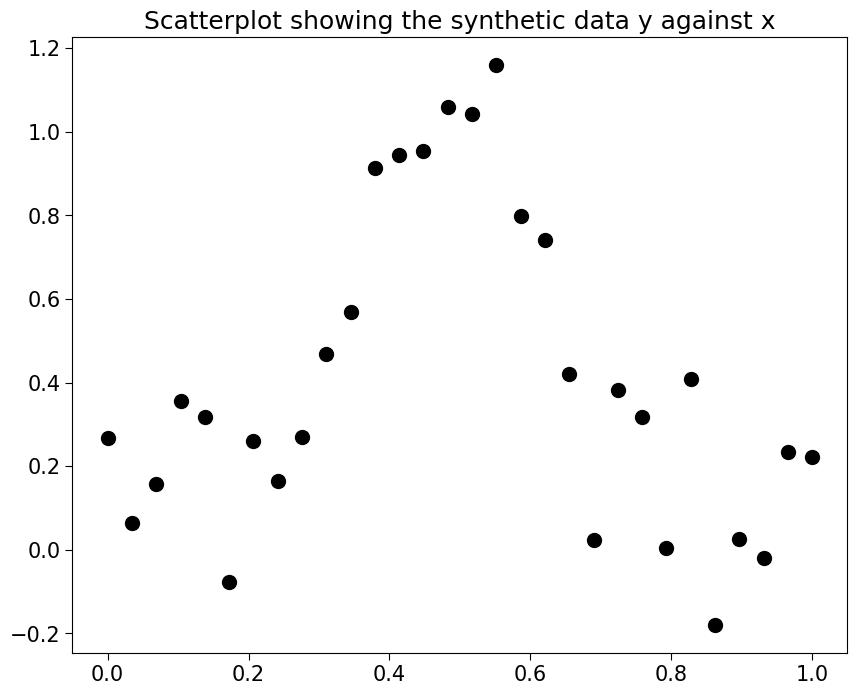

In [182]:
#STEP 3.2
#Now we try to visualise our data
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(x, y, color = "k", label = "the synthetic data")
ax.set_title("Scatterplot showing the synthetic data y against x")

#From the graph, we have 30 random points moving from 0 to 1. The y values change too because these are modelled by the exponential curve with the addition of noise.

Text(0.5, 1.0, 'Scatterplot showing the synthetic data y against x')

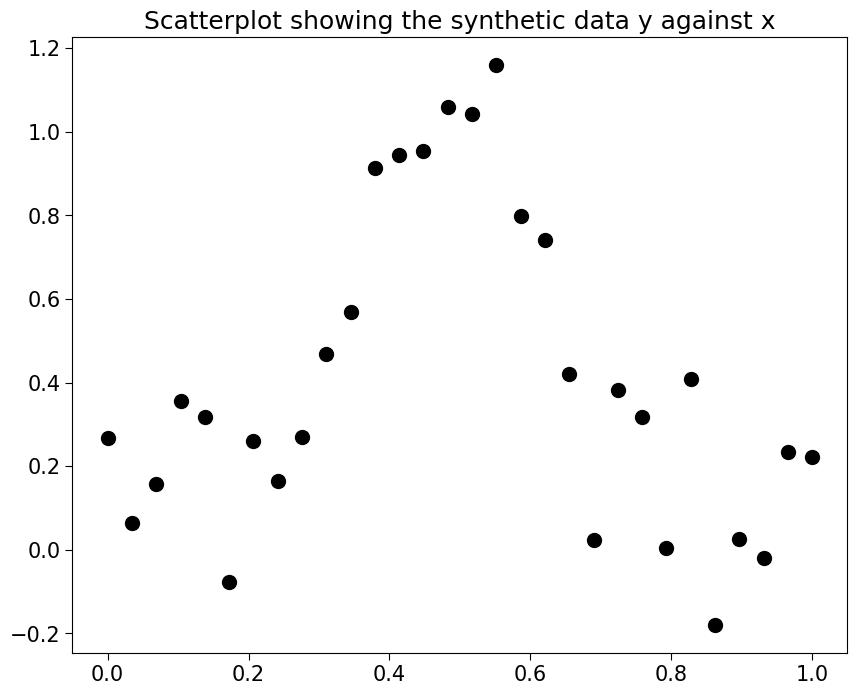

In [183]:
#STEP 3.3
#We try to sort them then plot and see what they would look like
sort_index = np.argsort(x.flatten())
x = x[sort_index]
y = y[sort_index]

fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(x, y, color = "k", label = "the synthetic data")
ax.set_title("Scatterplot showing the synthetic data y against x")
#This returns the same plot

In [184]:
#STEP 4
#Remember sklearn will need the x variables to be in a column format hence reshaping
X_reshaped = x.reshape(-1, 1)

In [185]:
#STEP 5
#We split the data threeways for training, valuation and testing
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.333, random_state=1) #This splits the data into train and test with test being 33 percent of the entire dataset


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= 0.5, random_state=1) #this takes the 66 percent put for training and splits its 50-50 such that we have 33% for training, 33% for valuation


In [186]:
#STEP 5.1
#For some reason, we are sorting the data from lowest to highest
sort_index = np.argsort(X_train.flatten())
X_train = X_train[sort_index]
y_train = y_train[sort_index]

In [187]:
#STEP 6
#Now implementing the linear regression model on it.But first, we fit the data
phi = PolynomialFeatures(4, include_bias=False)
P = phi.fit_transform(X_train)

In [188]:
#STEP 7
#Then now we create the regression model
model = LinearRegression().fit(P, y_train)

In [189]:
#Now we want to use the model to evaluate its performance

#STEP 8.0
#First we sort out our training data otherwise we get random plots
sort_index = np.argsort(X_val.flatten())
X_val = X_train[sort_index]
y_val = y_train[sort_index]


In [191]:
#STEP 8
#Now we fit the data into the model
X_val_for_predict = X_val.reshape(-1,1)
Q = phi.fit_transform(X_val_for_predict)
y_val_predict = model.predict(Q)
print(y_val_predict)

[ 0.80945555  0.27986814  0.79700475 -0.12712853  0.0275259   0.05522794
 -0.0461014   0.53817667  0.28369164  1.01014482]


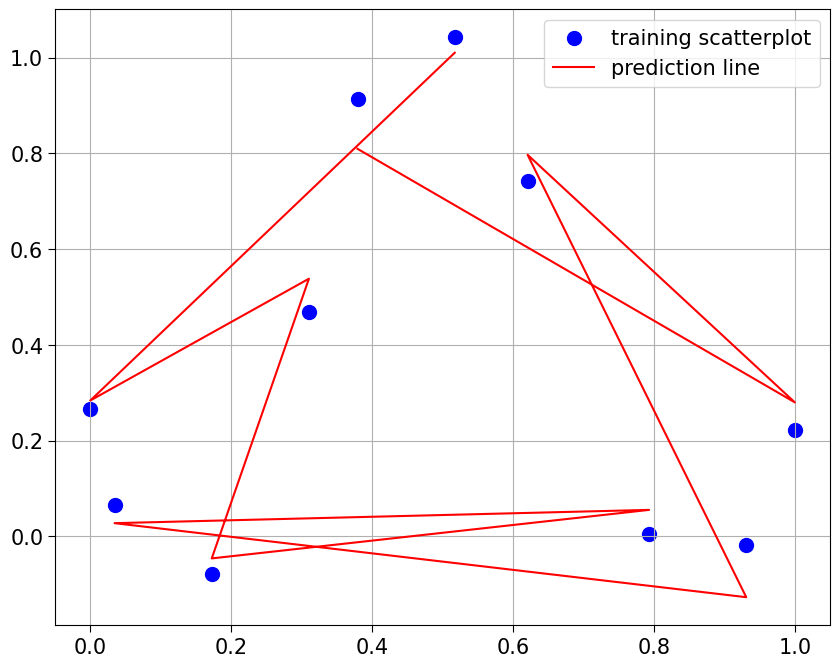

In [192]:
#STEP 8.1

#Then we can try plot to see what these actually look like
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(X_val, y_val, color = 'b', label = "training scatterplot")
ax.plot(X_val, y_val_predict, color = 'r', label = 'prediction line')
ax.grid()
ax.legend(loc = 'best')

This seems like extremely random data. No matter how much I change things up, it seems like there is, still, overfitting happening. Maybe this was the point fo the exercise? Let's try with the r2 score and see how the prediction model worked

In [193]:
#STEP 8.2
score = r2_score(y_val, y_val_predict)
print(score)

#polynomial features = 3, score = 0.47104439899751926
#polynomial features = 5, score = 0.9796516874821177
#polynomial features = 4, score = 0.97344961053945. This might be the most optimal but it still seems like there is some overfitting happening

0.97344961053945


0.9734496103131518


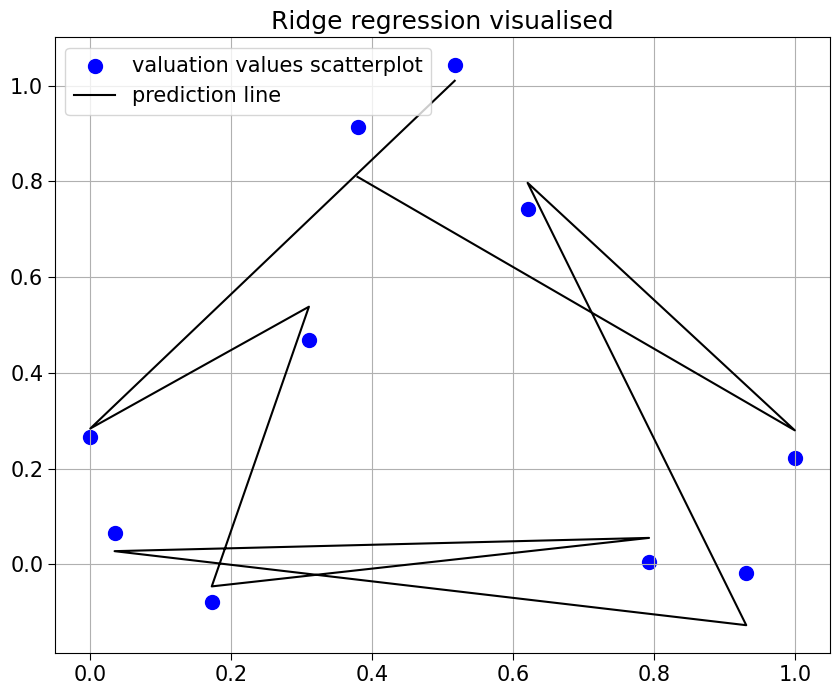

In [195]:
#STEP 8.3: Using the ridge approach

#create ridge object with alpha being 10^-9
ridge = Ridge(alpha= (10**-9))

#preparing the x train values for the ridge operation
phi = PolynomialFeatures(4, include_bias=False)
P_ridge = phi.fit_transform(X_train)

#preparing the x_val values for ridge prediction
X_val_for_predict_ridge = X_val.reshape(-1,1)
Q_ridge = phi.fit_transform(X_val_for_predict)

#training the ridge model then predicting
ridge.fit(P_ridge, y_train)
y_val_predict_ridge = ridge.predict(Q_ridge)


#Now visualising to see what our output is
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(X_val, y_val, color = 'b', label = 'valuation values scatterplot')
ax.plot(X_val, y_val_predict_ridge, color = 'k', label = 'prediction line')
ax.grid()
ax.legend(loc = 'best')
ax.set_title('Ridge regression visualised')


#Also, establishing the model's performance
score = r2_score(y_val, y_val_predict_ridge)
print(score)
#Returns 0.9734496103131518 which is the same as the previous one
#The question that comes to mind is this - with Ridge regression, do we have to set the number of polynomial features?
#The second question is this: would standardisation of the data prior to taking it into the regression model help with the accuracy of the resulting prediction output?

0.0007795339177166793


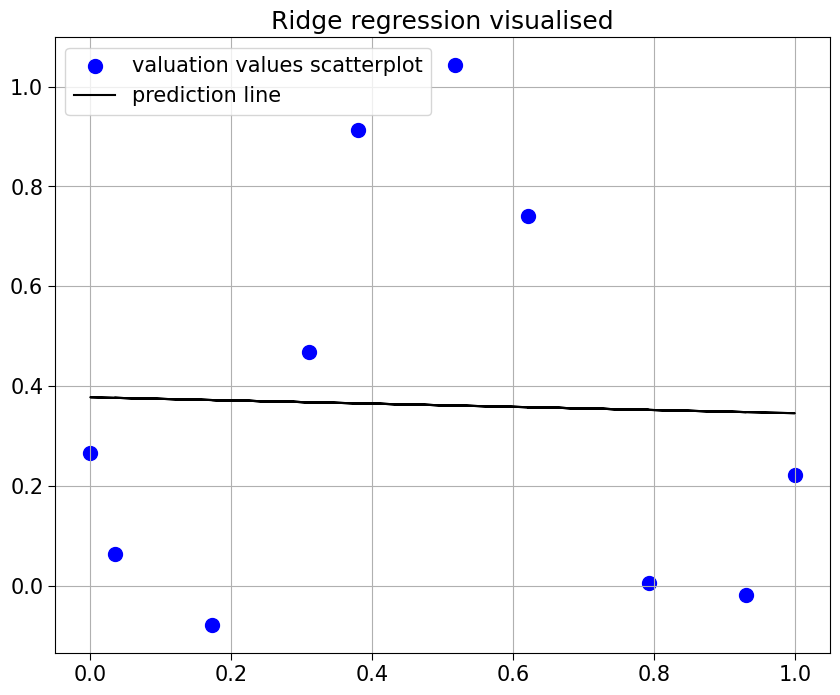

In [198]:
#STEP 8.3: Ridge regression without the polynomial features
#create ridge object with alpha being 10^-9
ridge = Ridge((10**-9))

#preparing the x_val values for ridge prediction (note that X_train is already reshaped into column format. We are reshaping X_val because it had not been reshaped yet)
X_val_reshaped = X_val.reshape(-1,1)

#training the ridge model then predicting
ridge.fit(X_train, y_train)
y_val_predict_ridge = ridge.predict(X_val_reshaped)


#Now visualising to see what our output is
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(X_val, y_val, color = 'b', label = 'valuation values scatterplot')
ax.plot(X_val, y_val_predict_ridge, color = 'k', label = 'prediction line')
ax.grid()
ax.legend(loc = 'best')
ax.set_title('Ridge regression visualised')


#Also, establishing the model's performance
score = r2_score(y_val, y_val_predict_ridge)
print(score)

#Returns 0.0007795339177166793 which is really low

In [204]:
#STEP 8.4: Ridge regression without polynomial features but with several alpha values
X_val_reshaped = X_val.reshape(-1,1)
alphas = np.logspace(-10,10,21)
for alpha in alphas:
     ridge = Ridge(alpha)
     ridge.fit(X_train, y_train)
     y_val_predict_ridge = ridge.predict(X_val_reshaped)
     score = (r2_score(y_val, y_val_predict_ridge))*100
     print(f'When alpha is {alpha}, the score is {score} percent')


When alpha is 1e-10, the score is 0.07795339177170124 percent
When alpha is 1e-09, the score is 0.07795339177166793 percent
When alpha is 1e-08, the score is 0.07795339177170124 percent
When alpha is 1e-07, the score is 0.07795339177169014 percent
When alpha is 1e-06, the score is 0.07795339177165683 percent
When alpha is 1e-05, the score is 0.07795339176586147 percent
When alpha is 0.0001, the score is 0.07795339118774613 percent
When alpha is 0.001, the score is 0.07795333346740652 percent
When alpha is 0.01, the score is 0.07794765105659796 percent
When alpha is 0.1, the score is 0.07745868715344217 percent
When alpha is 1.0, the score is 0.06117219010671748 percent
When alpha is 10.0, the score is 0.01531030011948653 percent
When alpha is 100.0, the score is 0.0017704382229588589 percent
When alpha is 1000.0, the score is 0.00017980610110823747 percent
When alpha is 10000.0, the score is 1.8008654534273916e-05 percent
When alpha is 100000.0, the score is 1.8011463098766e-06 percent

0.0007795339177170124


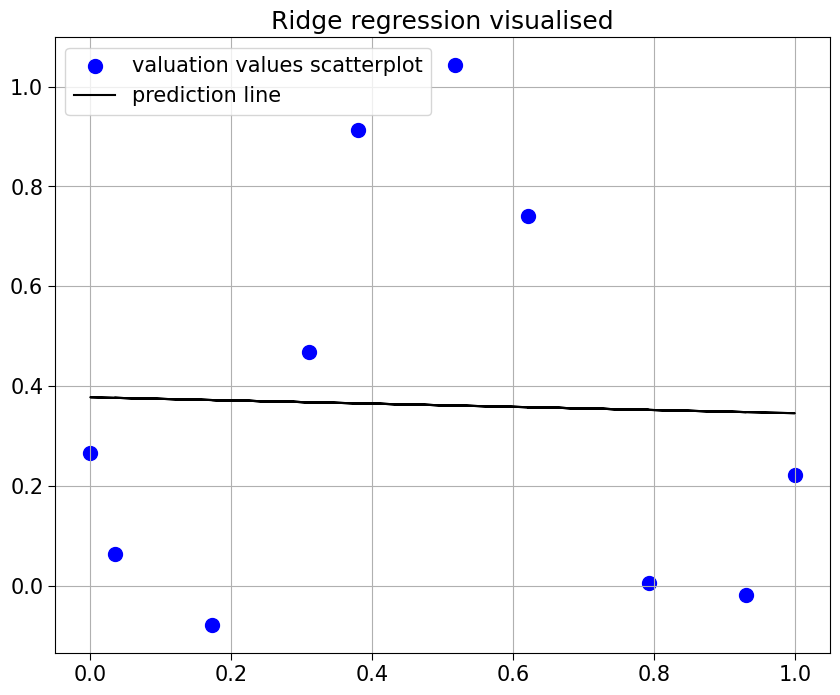

In [205]:
#STEP 8.5: Ridge regression without the polynomial features and alpha with highest score
#create ridge object with alpha being 10^-10
ridge = Ridge((10**-10))

#preparing the x_val values for ridge prediction (note that X_train is already reshaped into column format. We are reshaping X_val because it had not been reshaped yet)
X_val_reshaped = X_val.reshape(-1,1)

#training the ridge model then predicting
ridge.fit(X_train, y_train)
y_val_predict_ridge = ridge.predict(X_val_reshaped)


#Now visualising to see what our output is
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(X_val, y_val, color = 'b', label = 'valuation values scatterplot')
ax.plot(X_val, y_val_predict_ridge, color = 'k', label = 'prediction line')
ax.grid()
ax.legend(loc = 'best')
ax.set_title('Ridge regression visualised')


#Also, establishing the model's performance
score = r2_score(y_val, y_val_predict_ridge)
print(score) # returns 0.0007795339177170124